In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("C:/Users/my pc/Desktop/Capstone/cap 5/ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv("C:/Users/my pc/Desktop/Capstone/cap 5/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv("C:/Users/my pc/Desktop/Capstone/cap 5/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv("C:/Users/my pc/Desktop/Capstone/cap 5/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv("C:/Users/my pc/Desktop/Capstone/cap 5/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [3]:
print(df1.info())
print(df2.info())
print(df3.info())
print(df4.info())
print(df5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   ----

In [4]:
# Adding a 'time_frame' column to each DataFrame
df1['time_frame'] = '1990-1999'
df2['time_frame'] = '2000-2012'
df3['time_frame'] = '2012-2014'
df4['time_frame'] = '2015-2016'
df5['time_frame'] = '2017-present'

# Combine the DataFrames into a single DataFrame
combined_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Group by time frame and flat type, and then calculate the min and max resale prices
min_max_df = combined_df.groupby(['time_frame', 'flat_type'])['resale_price'].agg(['min', 'max']).reset_index()

# Display the result
print(min_max_df)

      time_frame         flat_type       min        max
0      1990-1999            1 ROOM    5000.0   142000.0
1      1990-1999            2 ROOM   12000.0   185000.0
2      1990-1999            3 ROOM   16600.0   745000.0
3      1990-1999            4 ROOM   32500.0   606000.0
4      1990-1999            5 ROOM   60000.0   688000.0
5      1990-1999         EXECUTIVE  110000.0   900000.0
6      1990-1999  MULTI GENERATION  140000.0   760000.0
7      2000-2012            1 ROOM   28000.0   250000.0
8      2000-2012            2 ROOM   54000.0   480000.0
9      2000-2012            3 ROOM   62500.0   899000.0
10     2000-2012            4 ROOM  105000.0   760000.0
11     2000-2012            5 ROOM   84500.0   903000.0
12     2000-2012         EXECUTIVE  125000.0   900000.0
13     2000-2012  MULTI-GENERATION  330000.0   780000.0
14     2012-2014            1 ROOM  195000.0   260000.0
15     2012-2014            2 ROOM  208000.0   363000.0
16     2012-2014            3 ROOM  248000.0  10

In [13]:
combined_df['flat_type'] = combined_df['flat_type'].replace('MULTI-GENERATION', 'MULTI GENERATION')

C:\Users\my pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\my pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


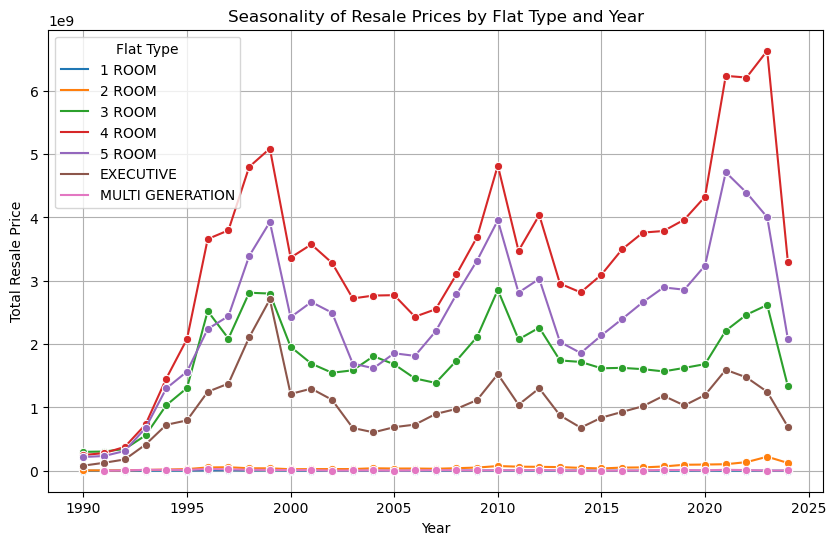

In [14]:
# Convert 'month' to datetime 
combined_df['month'] = pd.to_datetime(combined_df['month'])

# Extract the year from the month column
combined_df['year'] = combined_df['month'].dt.year

# Group by year and flat type, and calculate the sum of resale prices
grouped_df = combined_df.groupby(['year', 'flat_type'])['resale_price'].sum().reset_index()

# Plotting the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='year', y='resale_price', hue='flat_type', marker='o')

# Adding titles and labels
plt.title('Seasonality of Resale Prices by Flat Type and Year')
plt.xlabel('Year')
plt.ylabel('Total Resale Price')
plt.grid(True)
plt.legend(title='Flat Type')

# Show the plot
plt.show()

C:\Users\my pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\my pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


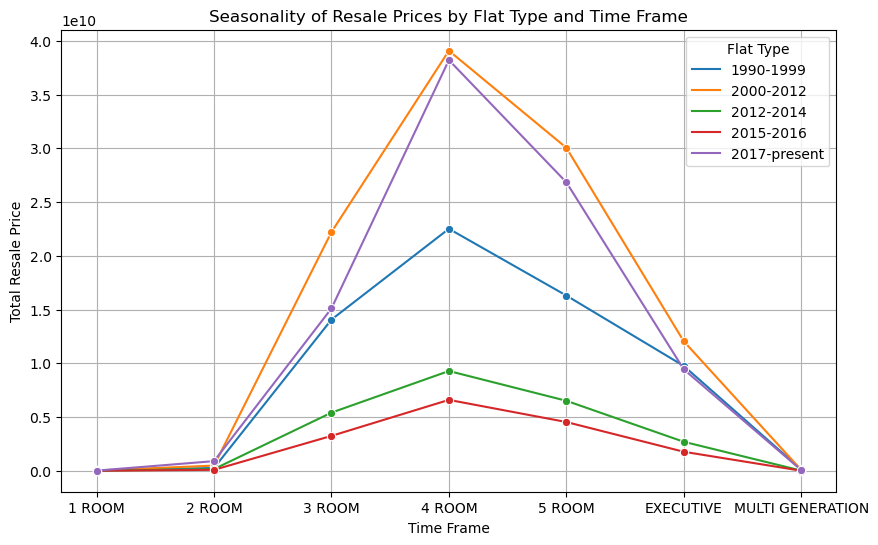

In [15]:
# Group by year and flat type, and calculate the sum of resale prices
grouped_df = combined_df.groupby(['time_frame', 'flat_type'])['resale_price'].sum().reset_index()

# Plotting the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='flat_type', y='resale_price', hue='time_frame', marker='o')

# Adding titles and labels
plt.title('Seasonality of Resale Prices by Flat Type and Time Frame')
plt.xlabel('Time Frame')
plt.ylabel('Total Resale Price')
plt.grid(True)
plt.legend(title='Flat Type')

# Show the plot
plt.show()

C:\Users\my pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\my pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


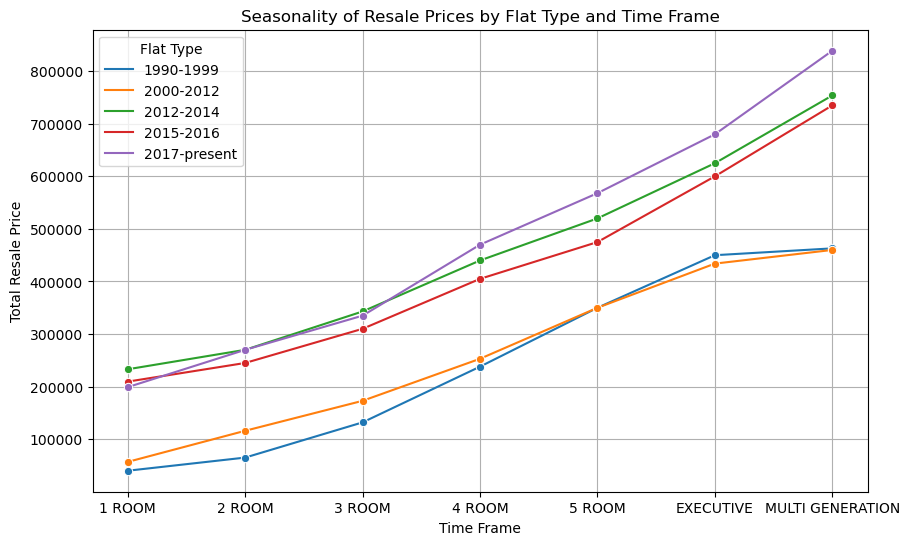

In [16]:
# Group by year and flat type, and calculate the sum of resale prices
grouped_df = combined_df.groupby(['time_frame', 'flat_type'])['resale_price'].median().reset_index()

# Plotting the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='flat_type', y='resale_price', hue='time_frame', marker='o')

# Adding titles and labels
plt.title('Seasonality of Resale Prices by Flat Type and Time Frame')
plt.xlabel('Time Frame')
plt.ylabel('Total Resale Price')
plt.grid(True)
plt.legend(title='Flat Type')

# Show the plot
plt.show()

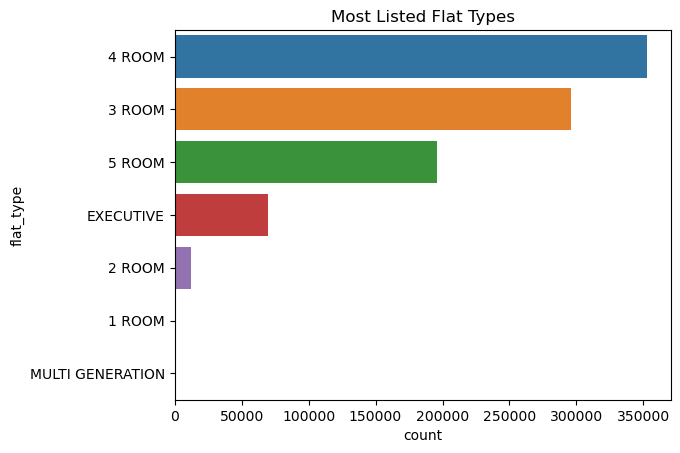

(Text(0.5, 1.0, 'Most Listed Flat Types'), None)

In [22]:
sns.countplot(data = combined_df,
              y = 'flat_type',
              order = combined_df['flat_type'].value_counts().index)
plt.title('Most Listed Flat Types'), plt.show()

In [23]:
combined_df['flat_type'].value_counts()

flat_type
4 ROOM              352716
3 ROOM              296198
5 ROOM              195641
EXECUTIVE            69733
2 ROOM               11859
1 ROOM                1304
MULTI GENERATION       543
Name: count, dtype: int64

In [151]:
combined_df['flat_model'] = combined_df['flat_model'].replace('NEW GENERATION', 'New Generation')
combined_df['flat_model'] = combined_df['flat_model'].replace('IMPROVED', 'Improved')
combined_df['flat_model'] = combined_df['flat_model'].replace('MODEL A', 'Model A')
combined_df['flat_model'] = combined_df['flat_model'].replace('PREMIUM APARTMENT', 'Premium Apartment')
combined_df['flat_model'] = combined_df['flat_model'].replace('SIMPLIFIED', 'Simplified')
combined_df['flat_model'] = combined_df['flat_model'].replace('STANDARD', 'Standard')
combined_df['flat_model'] = combined_df['flat_model'].replace('MAISONETTE', 'Maisonette')
combined_df['flat_model'] = combined_df['flat_model'].replace('APARTMENT', 'Apartment')
combined_df['flat_model'] = combined_df['flat_model'].replace('MULTI GENERATION', 'Multi Generation')
combined_df['flat_model'] = combined_df['flat_model'].replace('MODEL A-MAISONETTE', 'Model A-Maisonette')
combined_df['flat_model'] = combined_df['flat_model'].replace('IMPROVED-MAISONETTE', 'Improved-Maisonette')
combined_df['flat_model'] = combined_df['flat_model'].replace('TERRACE', 'Terrace')
combined_df['flat_model'] = combined_df['flat_model'].replace('2-ROOM', '2-room')

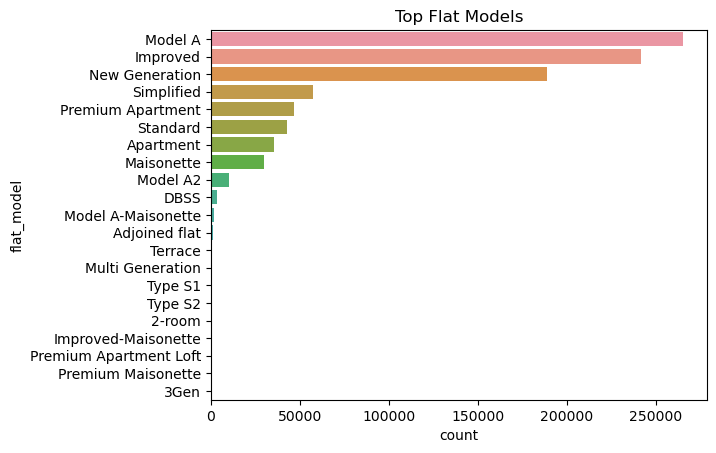

(Text(0.5, 1.0, 'Top Flat Models'), None)

In [152]:
sns.countplot(data = combined_df,
              y = 'flat_model',
              order = combined_df['flat_model'].value_counts().index), 
plt.title('Top Flat Models'), plt.show()

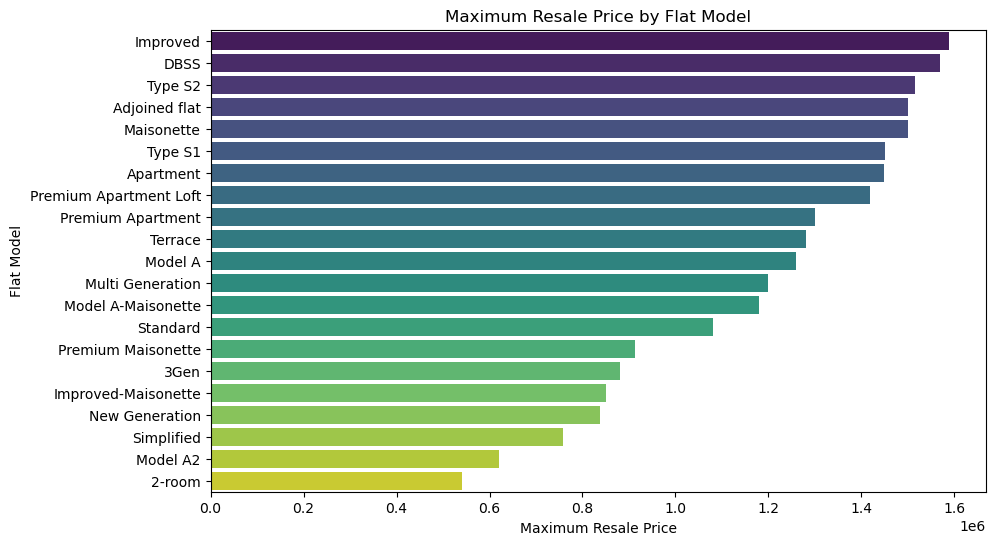

In [153]:
# Group by 'flat_model' and get the maximum 'resale_price'
max_resale_prices = combined_df.groupby('flat_model')['resale_price'].max().reset_index()

# Sorting the DataFrame by 'resale_price' in descending order
max_resale_prices_sorted = max_resale_prices.sort_values(by='resale_price', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='resale_price', y='flat_model', data=max_resale_prices_sorted, palette='viridis')
plt.xlabel('Maximum Resale Price')
plt.ylabel('Flat Model')
plt.title('Maximum Resale Price by Flat Model')
plt.show()

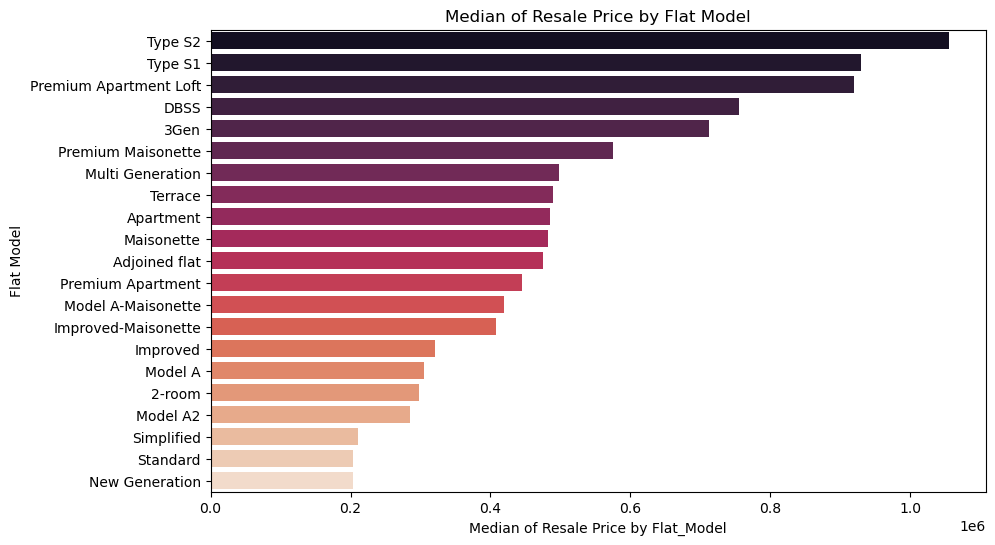

In [156]:
# Group by 'flat_model' and get the maximum 'resale_price'
max_resale_prices = combined_df.groupby('flat_model')['resale_price'].median().reset_index()

# Sorting the DataFrame by 'resale_price' in descending order
max_resale_prices_sorted = max_resale_prices.sort_values(by='resale_price', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='resale_price', y='flat_model', data=max_resale_prices_sorted, palette='rocket')
plt.xlabel('Median of Resale Price by Flat_Model')
plt.ylabel('Flat Model')
plt.title('Median of Resale Price by Flat Model')
plt.show()

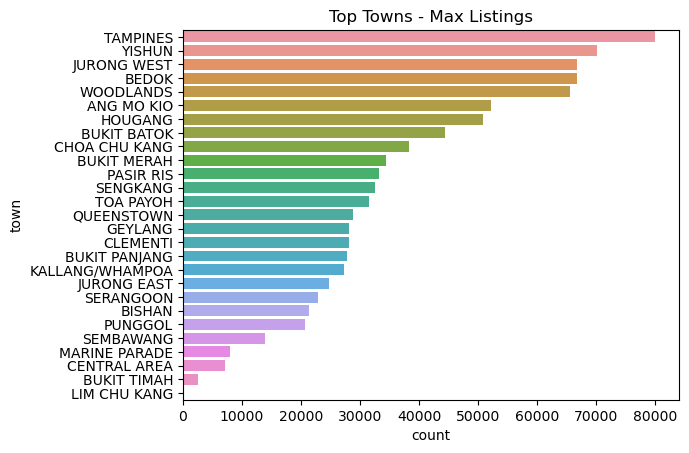

(Text(0.5, 1.0, 'Top Towns - Max Listings'), None)

In [42]:
sns.countplot(data = combined_df,
              y = 'town',
              order = combined_df['town'].value_counts().index), 
plt.title('Top Towns - Max Listings'), plt.show()

In [45]:
combined_df['town'] = combined_df.town.astype('category')
combined_df['flat_type'] = combined_df.flat_type.astype('category')

C:\Users\my pc\AppData\Local\Temp\ipykernel_2088\1765787058.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med_resale_prices = combined_df.groupby(['town', 'flat_type'])['resale_price'].median().reset_index()
C:\Users\my pc\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


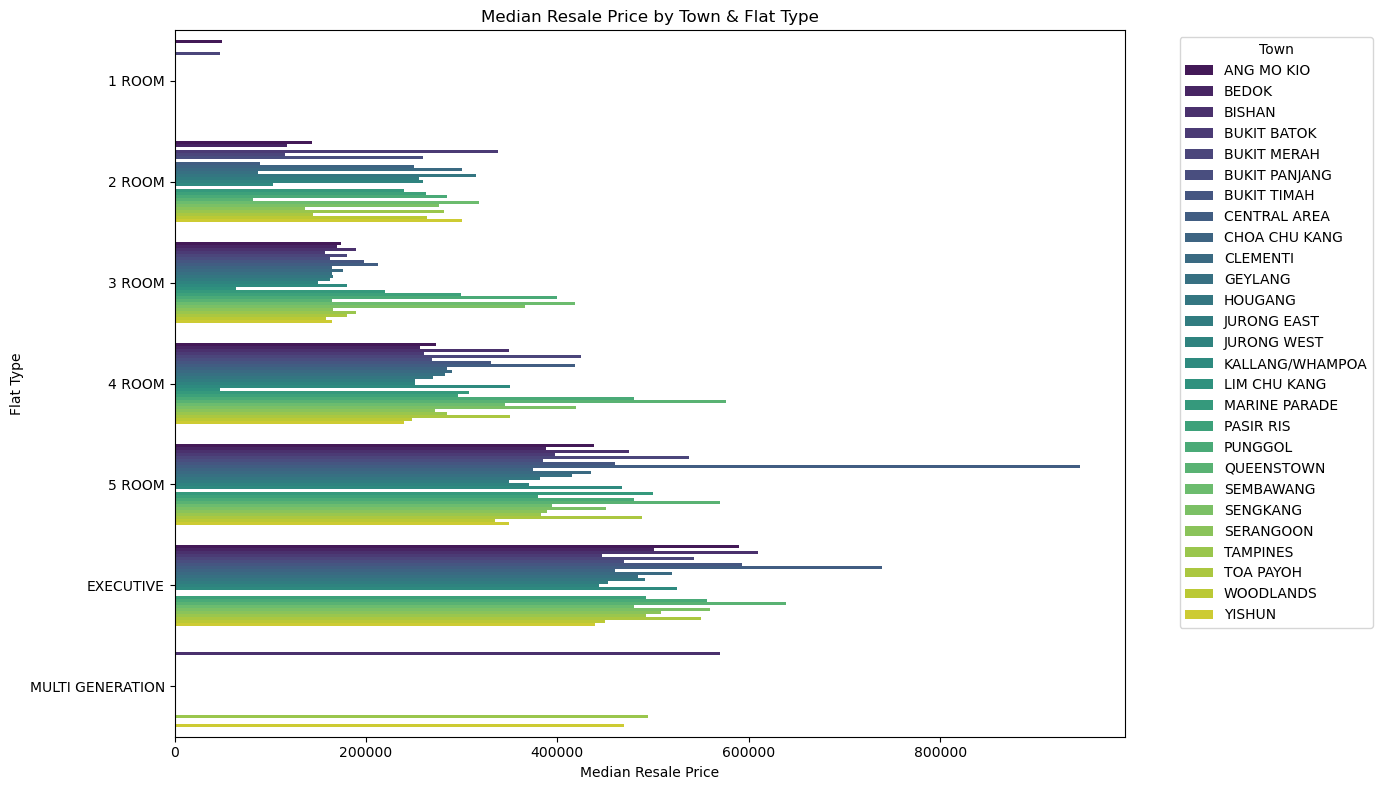

In [96]:
# Group by 'town' and 'flat_type' and calculate the median 'resale_price'
med_resale_prices = combined_df.groupby(['town', 'flat_type'])['resale_price'].median().reset_index()

# Sorting the DataFrame by 'resale_price' in descending order
med_resale_prices_sorted = med_resale_prices.sort_values(by='resale_price', ascending=False)

# Plot
plt.figure(figsize=(14, 8))  # Increased the figure size for better readability
sns.barplot(x='resale_price', y='flat_type', hue='town', data=med_resale_prices_sorted, palette='viridis')
plt.xlabel('Median Resale Price')
plt.ylabel('Flat Type')
plt.title('Resale Price by Town & Flat Type')
plt.legend(title='Town', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

In [ ]:
In Singapore, the locations of MRT (Mass Rapid Transit) stations are spread across various towns and districts, providing extensive coverage 
and connectivity. The Central Business District (CBD), a key area for commercial and business activities, is situated primarily in the central 
    region of Singapore. Below is a breakdown of towns where MRT stations and CBDs are prominently located:

### Key Towns with MRT Stations:

1. **Central Region**:
    - **Orchard**: Known for its shopping district and luxury hotels.
    - **Marina Bay**: A major financial district with iconic landmarks.
    - **Raffles Place**: The heart of the CBD with major banks and offices.
    - **Bugis**: A cultural and commercial hub.
    - **Chinatown**: Rich in heritage and home to traditional businesses.
    - **Little India**: A vibrant area known for its Indian cultural heritage.

2. **North-East Region**:
    - **Serangoon**: A residential and commercial area with good transport links.
    - **Hougang**: A mature town with various amenities and parks.
    - **Punggol**: A developing waterfront town with modern facilities.
    - **Sengkang**: Known for its young families and recreational options.

3. **East Region**:
    - **Tampines**: A major regional center with commercial and residential areas.
    - **Bedok**: A large residential town with numerous facilities.
    - **Pasir Ris**: A coastal town with a relaxed atmosphere.
    - **Changi**: Home to Changi Airport and various logistics facilities.

4. **West Region**:
    - **Jurong East**: A major commercial and residential hub.
    - **Clementi**: A town known for its educational institutions and amenities.
    - **Bukit Batok**: A residential town with a mix of private and public housing.
    - **Woodlands**: A gateway to Malaysia with a bustling town center.
    - **Choa Chu Kang**: A well-developed residential town with good amenities.

5. **North Region**:
    - **Yishun**: Known for its residential estates and recreational options.
    - **Sembawang**: A town with a blend of historical and modern elements.
    - **Ang Mo Kio**: A mature town with a mix of residential and commercial areas.
    - **Khatib**: A residential area with good connectivity and amenities.

### Towns within the Central Business District (CBD):

The CBD is located primarily in the central area of Singapore and includes several key sub-districts:

1. **Marina Bay**:
    - A prominent financial and commercial district.
    - Home to iconic landmarks like Marina Bay Sands, Gardens by the Bay.

2. **Raffles Place**:
    - The traditional heart of Singapore's financial district.
    - Houses many major banks and multinational companies.

3. **Tanjong Pagar**:
    - A mixed-use district with commercial and residential developments.
    - Known for its heritage sites and modern office buildings.

4. **Shenton Way**:
    - Another major commercial area within the CBD.
    - Features high-rise office buildings and financial institutions.

5. **Telok Ayer**:
    - A historic area with a blend of cultural landmarks and modern offices.
    - Known for its heritage shophouses and trendy eateries.

6. **Cecil Street**:
    - Part of the CBD with numerous commercial offices.
    - Known for its proximity to other key business areas.

7. **Robinson Road**:
    - A key road within the CBD featuring many office buildings.
    - A significant area for business and commercial activities.

### Map and Navigation:

For precise locations and to navigate through the MRT stations and the CBD, you can use resources like the Singapore Land Transport Authority (LTA) map
or Google Maps. These tools provide comprehensive views and help in planning travel routes efficiently.

### Conclusion:

The towns mentioned above are pivotal in Singapore's transportation network and commercial landscape. 
They offer a diverse mix of residential, commercial, and recreational opportunities, making Singapore a well-connected and vibrant city-state.

In [53]:
towns = list(combined_df['town'].unique())

In [54]:
towns

['ANG MO KIO',
 'BEDOK',
 'BISHAN',
 'BUKIT BATOK',
 'BUKIT MERAH',
 'BUKIT TIMAH',
 'CENTRAL AREA',
 'CHOA CHU KANG',
 'CLEMENTI',
 'GEYLANG',
 'HOUGANG',
 'JURONG EAST',
 'JURONG WEST',
 'KALLANG/WHAMPOA',
 'MARINE PARADE',
 'QUEENSTOWN',
 'SENGKANG',
 'SERANGOON',
 'TAMPINES',
 'TOA PAYOH',
 'WOODLANDS',
 'YISHUN',
 'LIM CHU KANG',
 'SEMBAWANG',
 'BUKIT PANJANG',
 'PASIR RIS',
 'PUNGGOL']

In [ ]:
Certainly! Below is a detailed list of MRT stations and key commercial/business districts (CBDs) located within each of the towns you mentioned 
in Singapore. The CBDs refer to significant commercial areas where business activities are concentrated.

### MRT Stations and CBDs by Town:

#### **1. ANG MO KIO**
- **MRT Stations**: Ang Mo Kio (NS16)
- **Key Areas/CBDs**: Ang Mo Kio Hub (AMK Hub), a major commercial center with various amenities.

#### **2. BEDOK**
- **MRT Stations**: Bedok (EW5), Tanah Merah (EW4), Kembangan (EW6)
- **Key Areas/CBDs**: Bedok Town Centre, with Bedok Mall and other retail and commercial establishments.

#### **3. BISHAN**
- **MRT Stations**: Bishan (NS17/CC15)
- **Key Areas/CBDs**: Junction 8 Shopping Centre, a significant retail and entertainment hub in Bishan.

#### **4. BUKIT BATOK**
- **MRT Stations**: Bukit Batok (NS2), Bukit Gombak (NS3)
- **Key Areas/CBDs**: West Mall, a key shopping and commercial area.

#### **5. BUKIT MERAH**
- **MRT Stations**: Redhill (EW18), Tiong Bahru (EW17), Telok Blangah (CC28), Labrador Park (CC27)
- **Key Areas/CBDs**: Tiong Bahru Plaza, VivoCity (close to HarbourFront MRT, not directly in Bukit Merah but adjacent).

#### **6. BUKIT TIMAH**
- **MRT Stations**: Beauty World (DT5), King Albert Park (DT6), Sixth Avenue (DT7), Tan Kah Kee (DT8)
- **Key Areas/CBDs**: Bukit Timah Shopping Centre, Beauty World Centre.

#### **7. CENTRAL AREA**
- **MRT Stations**: Raffles Place (NS26/EW14), City Hall (NS25/EW13), Bugis (EW12/DT14), Chinatown (NE4/DT19), Dhoby Ghaut (NS24/NE6/CC1), 
    Marina Bay (NS27/CE2/TE20)
- **Key Areas/CBDs**: Marina Bay, Raffles Place, Tanjong Pagar, Shenton Way, and Clarke Quay, the core CBD of Singapore with numerous business 
    and commercial entities.

#### **8. CHOA CHU KANG**
- **MRT Stations**: Choa Chu Kang (NS4/BP1), Yew Tee (NS5)
- **Key Areas/CBDs**: Lot One Shoppers’ Mall, a major retail and commercial hub in the area.

#### **9. CLEMENTI**
- **MRT Stations**: Clementi (EW23)
- **Key Areas/CBDs**: Clementi Mall, an important retail and commercial complex.

#### **10. GEYLANG**
- **MRT Stations**: Aljunied (EW9), Paya Lebar (EW8/CC9), Dakota (CC8), Mountbatten (CC7)
- **Key Areas/CBDs**: Paya Lebar Quarter, a significant business and commercial district.

#### **11. HOUGANG**
- **MRT Stations**: Hougang (NE14), Kovan (NE13)
- **Key Areas/CBDs**: Hougang Mall, a central commercial hub.

#### **12. JURONG EAST**
- **MRT Stations**: Jurong East (NS1/EW24), Chinese Garden (EW25), Lakeside (EW26)
- **Key Areas/CBDs**: JCube, Westgate, and JEM, forming a significant commercial and retail cluster.

#### **13. JURONG WEST**
- **MRT Stations**: Boon Lay (EW27), Pioneer (EW28), Joo Koon (EW29)
- **Key Areas/CBDs**: Jurong Point, a major commercial and shopping center.

#### **14. KALLANG/WHAMPOA**
- **MRT Stations**: Kallang (EW10), Lavender (EW11), Boon Keng (NE9), Bendemeer (DT23), Farrer Park (NE8)
- **Key Areas/CBDs**: Kallang Wave Mall, near the Singapore Sports Hub, and City Square Mall in the Farrer Park area.

#### **15. MARINE PARADE**
- **MRT Stations**: Marine Terrace (TE27, upcoming), Marine Parade (TE26, upcoming)
- **Key Areas/CBDs**: Parkway Parade, a significant retail and commercial center in the area.

#### **16. QUEENSTOWN**
- **MRT Stations**: Queenstown (EW19), Commonwealth (EW20), Buona Vista (EW21/CC22), One-North (CC23)
- **Key Areas/CBDs**: The Star Vista, a mixed-use complex with retail and commercial spaces.

#### **17. SENGKANG**
- **MRT Stations**: Sengkang (NE16/STC), Buangkok (NE15)
- **Key Areas/CBDs**: Compass One, a key commercial center in Sengkang.

#### **18. SERANGOON**
- **MRT Stations**: Serangoon (NE12/CC13)
- **Key Areas/CBDs**: NEX, one of the largest suburban malls in Singapore, serving as a major retail and commercial hub.

#### **19. TAMPINES**
- **MRT Stations**: Tampines (EW2/DT32), Tampines East (DT33), Tampines West (DT31)
- **Key Areas/CBDs**: Tampines Mall, Century Square, and Our Tampines Hub, forming a major retail and commercial center.

#### **20. TOA PAYOH**
- **MRT Stations**: Toa Payoh (NS19), Braddell (NS18)
- **Key Areas/CBDs**: HDB Hub, a significant commercial and administrative center.

#### **21. WOODLANDS**
- **MRT Stations**: Woodlands (NS9/TE2), Marsiling (NS8), Admiralty (NS10)
- **Key Areas/CBDs**: Causeway Point, a major retail and commercial complex.

#### **22. YISHUN**
- **MRT Stations**: Yishun (NS13), Khatib (NS14)
- **Key Areas/CBDs**: Northpoint City, a major shopping and commercial hub.

#### **23. LIM CHU KANG**
- **MRT Stations**: No MRT stations directly in Lim Chu Kang, but nearby stations include Kranji (NS7)
- **Key Areas/CBDs**: Primarily an agricultural and military area, with limited commercial activity.

#### **24. SEMBAWANG**
- **MRT Stations**: Sembawang (NS11), Canberra (NS12)
- **Key Areas/CBDs**: Sun Plaza, a significant shopping and commercial area.

#### **25. BUKIT PANJANG**
- **MRT Stations**: Bukit Panjang (BP6/DT1), Cashew (DT2), Hillview (DT3)
- **Key Areas/CBDs**: Hillion Mall, Junction 10, key commercial centers.

#### **26. PASIR RIS**
- **MRT Stations**: Pasir Ris (EW1)
- **Key Areas/CBDs**: White Sands Shopping Mall, a central commercial hub.

#### **27. PUNGGOL**
- **MRT Stations**: Punggol (NE17/PTC)
- **Key Areas/CBDs**: Waterway Point, a significant retail and commercial center in Punggol.

### Summary

These towns are well-connected with MRT stations, and many also host significant commercial and business districts that serve as focal points 
for economic activities in the region. The integration of MRT stations within these towns enhances accessibility and supports the 
vibrant commercial landscapes across Singapore.

In [ ]:
Owning a car in Singapore involves several constraints and costs. Here are the key factors to consider:

1. **Certificate of Entitlement (COE)**: To own a vehicle in Singapore, you must first obtain a COE. It represents the right to vehicle ownership 
     and allows you to use limited road space for 10 years¹.

2. **Open Market Value (OMV)**: The OMV is the price paid when a vehicle is imported into Singapore. 
   It includes the purchase price, insurance, freight, and other charges related to the sale and delivery of the car. 
   Taxes and fees are calculated based on the OMV.

3. **Additional Registration Fee (ARF)**: The ARF is a tax imposed when registering a vehicle. 
   It`s calculated as a percentage of the vehicle`s OMV.

4. **Excise Duty**: Similar to alcohol and tobacco, cars imported into Singapore are subject to a standard 20% tax based on the OMV.

5. **Goods and Services Tax (GST)**: GST (currently 8%) is imposed on the OMV and Excise Duty, not the overall purchase price.

6. **Other Costs**: Besides the above, there are registration fees, taxes, duties, and additional expenses to consider.

Given these factors, owning a car in Singapore can be quite expensive, with prices exceeding €100,000⁴. Keep in mind that Singapore's efficient
public transportation system may make car ownership less necessary for some commuters. 😊🚗

Source: Conversation with Copilot, 21/6/2024
(1) Owning a Car in Singapore: What You Should Know and Consider. 
https://plannerbee.co/learn-personal-finance/owning-a-car-in-singapore-what-you-should-know-and-consider/.
(2) In Singapore, the right to own a car costs more than €100,000. 
https://www.euronews.com/business/2023/10/05/in-singapore-the-right-to-own-a-car-costs-more-than-100000-plus-the-cost-of-the-car.
(3) Your checklist guide to buying a car in Singapore - 
The Honeycombers. https://bing.com/search?q=constraints+for+a+person+to+own+a+car+in+singapore.
(4) Own a car in Singapore - Drive In Singapore. 
https://driveinsg.com/own-a-car-in-singapore/.
(5) 4 Financial Decisions To Consider When Buying A Car In Singapore. 
https://dollarsandsense.sg/4-financial-decisions-consider-buying-car-singapore/.

In [ ]:
owing to the above fact residential areas are likely to be around MRTs and MRTs infrastructures developed in and 
around heavily populated area.
Therefore, Proximity to amenities such as MRT stations, schools, shopping centres, and 
parks may not significantly impacts resale prices.

In [55]:
combined_df['age_of_flat'] = 2024 - combined_df['lease_commence_date']

C:\Users\my pc\AppData\Local\Temp\ipykernel_2088\3782838704.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med_resale_prices1 = combined_df.groupby(['age_of_flat', 'flat_type'])['resale_price'].median().reset_index()


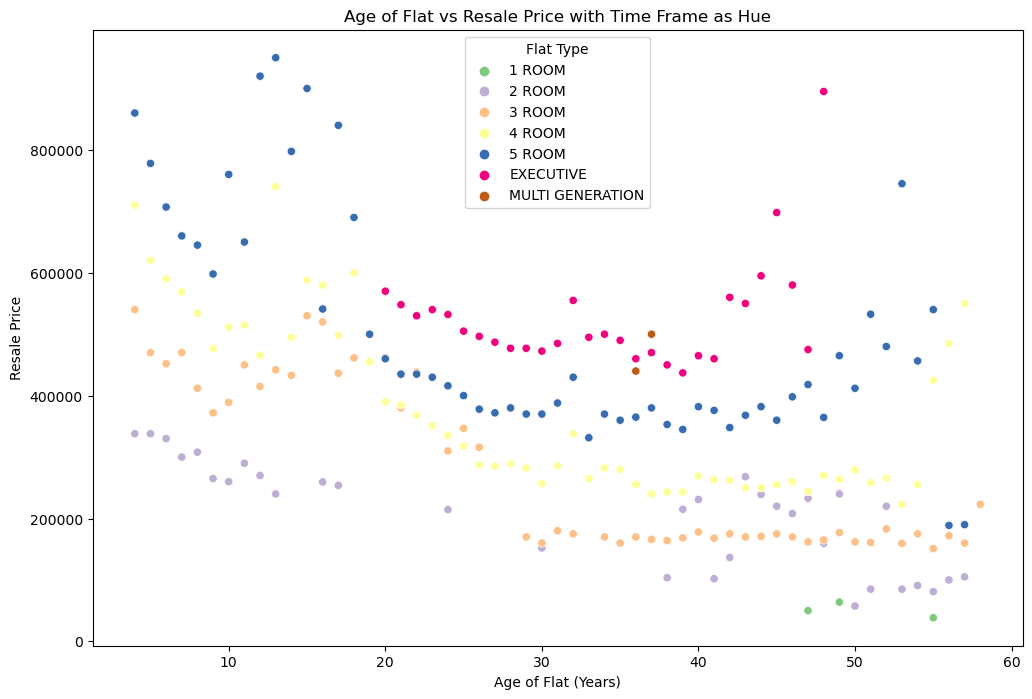

In [67]:
med_resale_prices1 = combined_df.groupby(['age_of_flat', 'flat_type'])['resale_price'].median().reset_index()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=med_resale_prices1, x='age_of_flat', y='resale_price', hue = 'flat_type', palette='Accent')

# Adding title and labels
plt.title('Age of Flat vs Resale Price with Time Frame as Hue')
plt.xlabel('Age of Flat (Years)')
plt.ylabel('Resale Price')

# Show plot
plt.legend(title = 'Flat Type')
plt.show()

In [ ]:
The overall trend of the above plot shows a decreasing trend in resale price with age of flat, for  any flat type.
Therefore the plot of remaining lease vs price is likely to show a same trend, i.e., greater the remaining lease higher the resale price.

C:\Users\my pc\AppData\Local\Temp\ipykernel_2088\2166560643.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med_resale_prices2 = combined_df.groupby(['remaining_lease_months', 'flat_type'])['resale_price'].mean().reset_index()


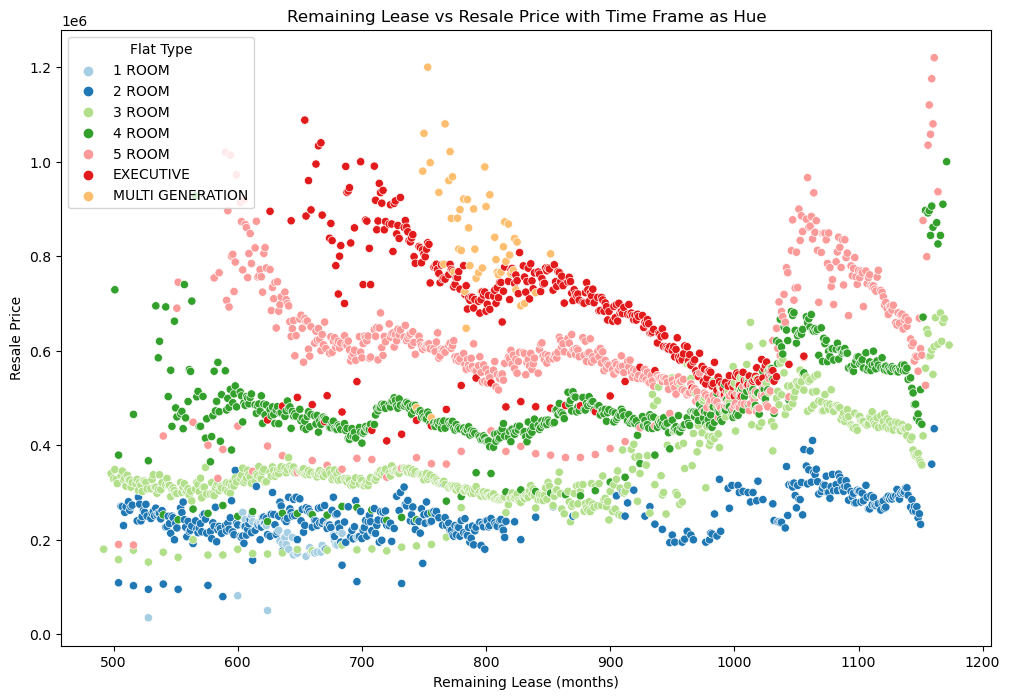

In [94]:
med_resale_prices2 = combined_df.groupby(['remaining_lease_months', 'flat_type'])['resale_price'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=med_resale_prices2, x='remaining_lease_months', y='resale_price', hue = 'flat_type', palette='Paired')

# Adding title and labels
plt.title('Remaining Lease vs Resale Price with Time Frame as Hue')
plt.xlabel('Remaining Lease (months)')
plt.ylabel('Resale Price')

# Show plot
plt.legend(title = 'Flat Type')
plt.show()

In [ ]:
The flat types that we previously saw were in 
demand show an increase/spike in resale value if the remaining lease is more than 80 years, i.e., fairly new flat types.

C:\Users\my pc\AppData\Local\Temp\ipykernel_2088\2286359487.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_resale_prices3 = combined_df.groupby(['storey_range', 'flat_type'])['resale_price'].median().reset_index()
C:\Users\my pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\my pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\my pc\anaconda3\Lib\site-packages\seaborn

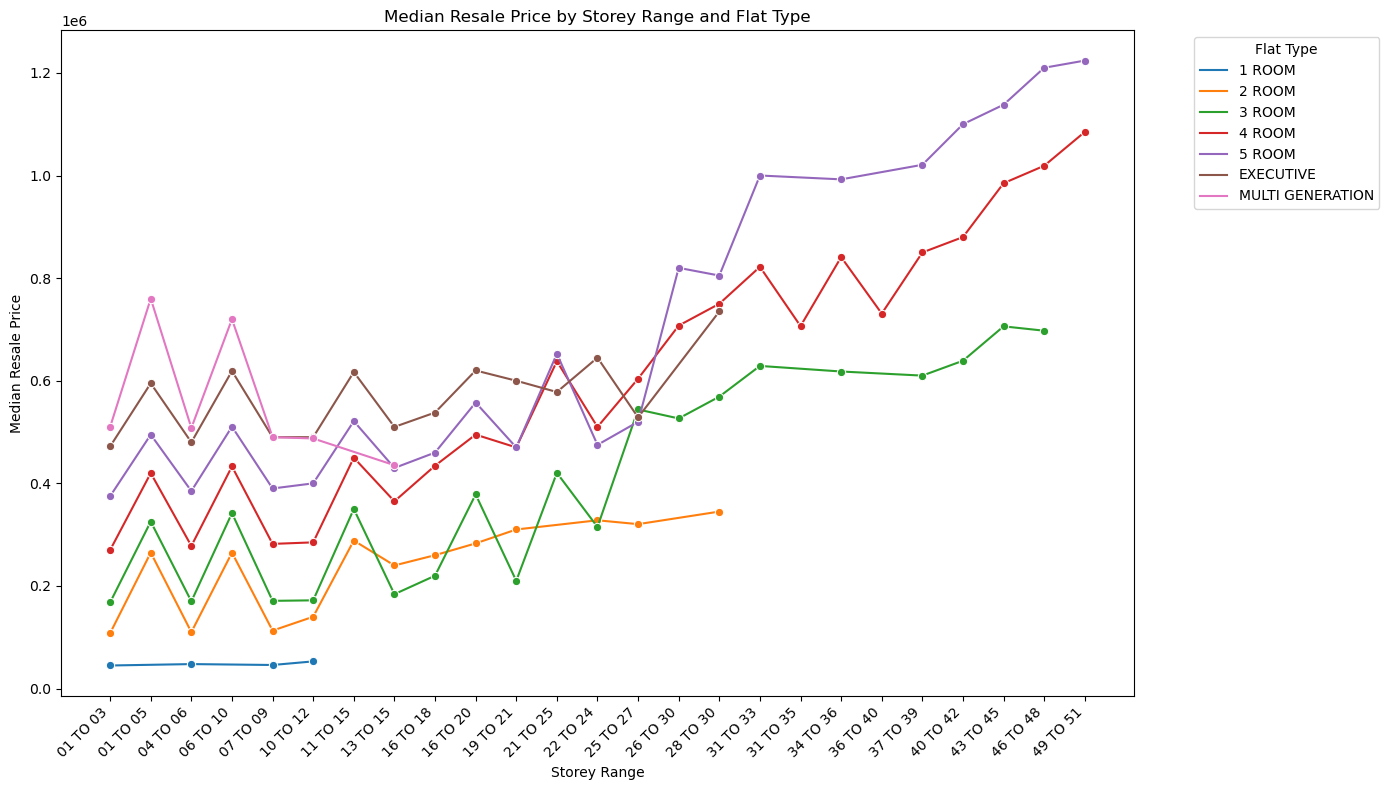

In [107]:
# Calculate the median resale price for each combination of storey_range and flat_type
median_resale_prices3 = combined_df.groupby(['storey_range', 'flat_type'])['resale_price'].median().reset_index()

# Plot using seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=median_resale_prices3, x='storey_range', y='resale_price', hue='flat_type', marker='o', palette='tab10')

# Adding title and labels
plt.title('Median Resale Price by Storey Range and Flat Type')
plt.xlabel('Storey Range')
plt.ylabel('Median Resale Price')
plt.xticks(rotation=45, ha='right')

# legend and plot
plt.legend(title='Flat Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()

In [ ]:
Higher the storey, higher the pricing, irrespective of the flat type.

C:\Users\my pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\my pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


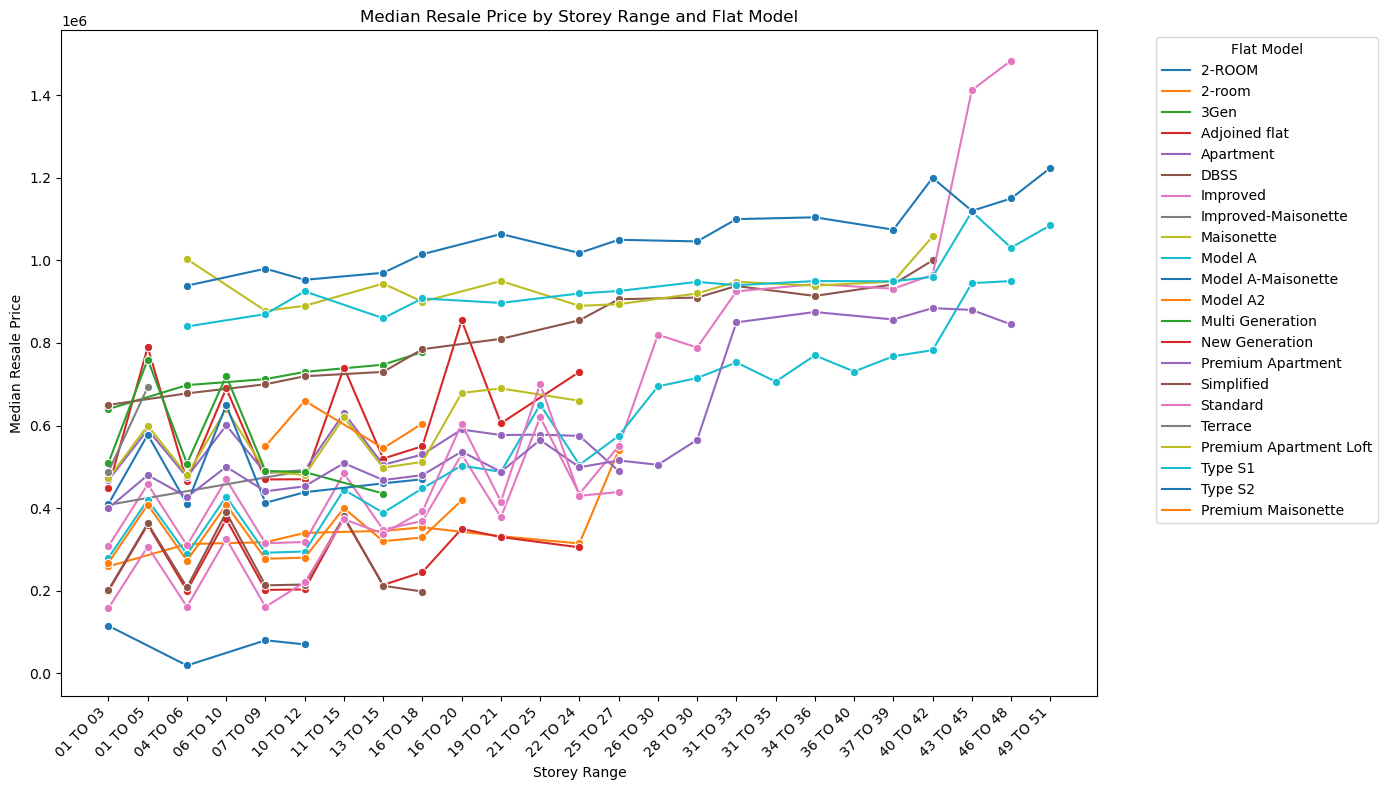

In [113]:
# Calculate the median resale price for each combination of storey_range and flat_type
median_resale_prices4 = combined_df.groupby(['storey_range', 'flat_model'])['resale_price'].median().reset_index()

# Plot using seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=median_resale_prices4, x='storey_range', y='resale_price', hue='flat_model', marker='o', palette='tab10')

# Adding title and labels
plt.title('Median Resale Price by Storey Range and Flat Model')
plt.xlabel('Storey Range')
plt.ylabel('Median Resale Price')
plt.xticks(rotation=45, ha='right')

# legend and plot
plt.legend(title='Flat Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()

In [ ]:
we previously saw that type S1,type S2, Premium apartmet loft, ddbs, 3gen were the top 5 highest priced models in that order.
the same trend is observed here as well, and the prices seem to escalate with the view (higher storey_range)

In [127]:
# Assuming 'num_rooms' can be derived from 'flat_type'
def num_rooms(flat_type):
    mapping = {
        '1 ROOM': 1,
        '2 ROOM': 2,
        '3 ROOM': 3,
        '4 ROOM': 4,
        '5 ROOM': 4.5,
        'EXECUTIVE': 6,  # Assumption, can vary based on data
        'MULTI GENERATION': 5  # Assumption, can vary based on data
    }
    return mapping.get(flat_type, 0)

# Create a column for number of rooms
combined_df['num_rooms'] = combined_df['flat_type'].apply(num_rooms)

# Convert the 'num_rooms' column to numeric type, if not already
combined_df['num_rooms'] = pd.to_numeric(combined_df['num_rooms'])

# Ensure 'floor_area_sqm' is also numeric
combined_df['floor_area_sqm'] = pd.to_numeric(combined_df['floor_area_sqm'], errors='coerce')

# Calculate the layout functionality metric: floor area per room
combined_df['layout_functionality'] = combined_df['floor_area_sqm'] / combined_df['num_rooms']

# Check the new column
print(combined_df[['flat_type', 'floor_area_sqm', 'num_rooms', 'layout_functionality']].head())


  flat_type  floor_area_sqm  num_rooms  layout_functionality
0    1 ROOM            31.0        1.0             31.000000
1    1 ROOM            31.0        1.0             31.000000
2    1 ROOM            31.0        1.0             31.000000
3    1 ROOM            31.0        1.0             31.000000
4    3 ROOM            73.0        3.0             24.333333


In [128]:
# Calculate the median resale price for each flat model and time frame
median_resale_prices = combined_df.groupby(['flat_model', 'time_frame'])['resale_price'].median().reset_index()

# Merge with layout functionality
flat_model_functionality = combined_df.groupby('flat_model')['layout_functionality'].median().reset_index()
merged_df = pd.merge(median_resale_prices, flat_model_functionality, on='flat_model')

print(merged_df.head())

  flat_model    time_frame  resale_price  layout_functionality
0     2-ROOM     1990-1999       76000.0             22.500000
1     2-room     2000-2012      189000.0             23.500000
2     2-room     2015-2016      240000.0             23.500000
3     2-room  2017-present      320000.0             23.500000
4       3Gen  2017-present      712500.0             26.666667


C:\Users\my pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\my pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


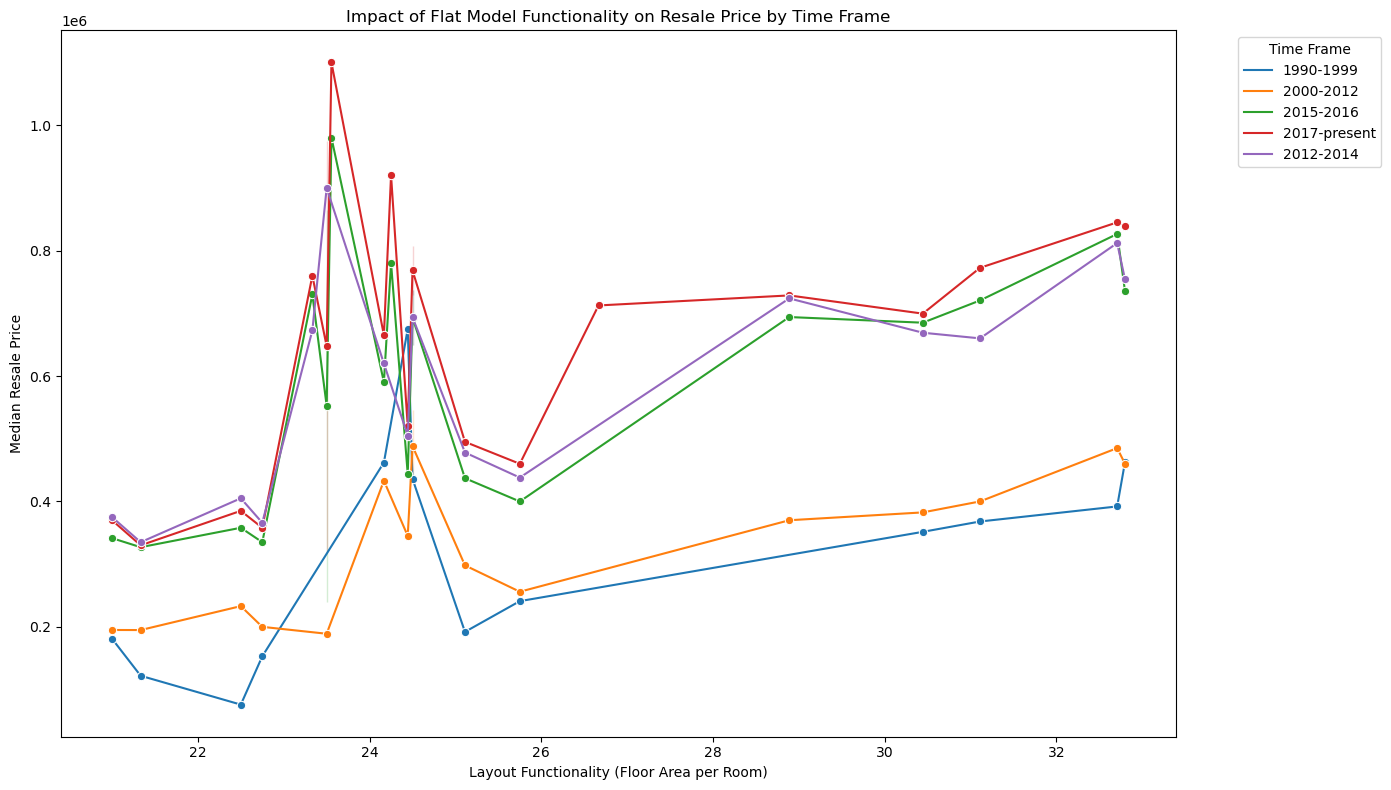

In [129]:
# Plotting the data
plt.figure(figsize=(14, 8))
sns.lineplot(data=merged_df, x='layout_functionality', y='resale_price', hue='time_frame', marker='o', palette='tab10')

# Adding title and labels
plt.title('Impact of Flat Model Functionality on Resale Price by Time Frame')
plt.xlabel('Layout Functionality (Floor Area per Room)')
plt.ylabel('Median Resale Price')

# Show legend and plot
plt.legend(title='Time Frame', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\my pc\AppData\Local\Temp\ipykernel_2088\2181201832.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_price_per_sqm = combined_df.groupby('town')['price_per_sqm'].median().reset_index()
C:\Users\my pc\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


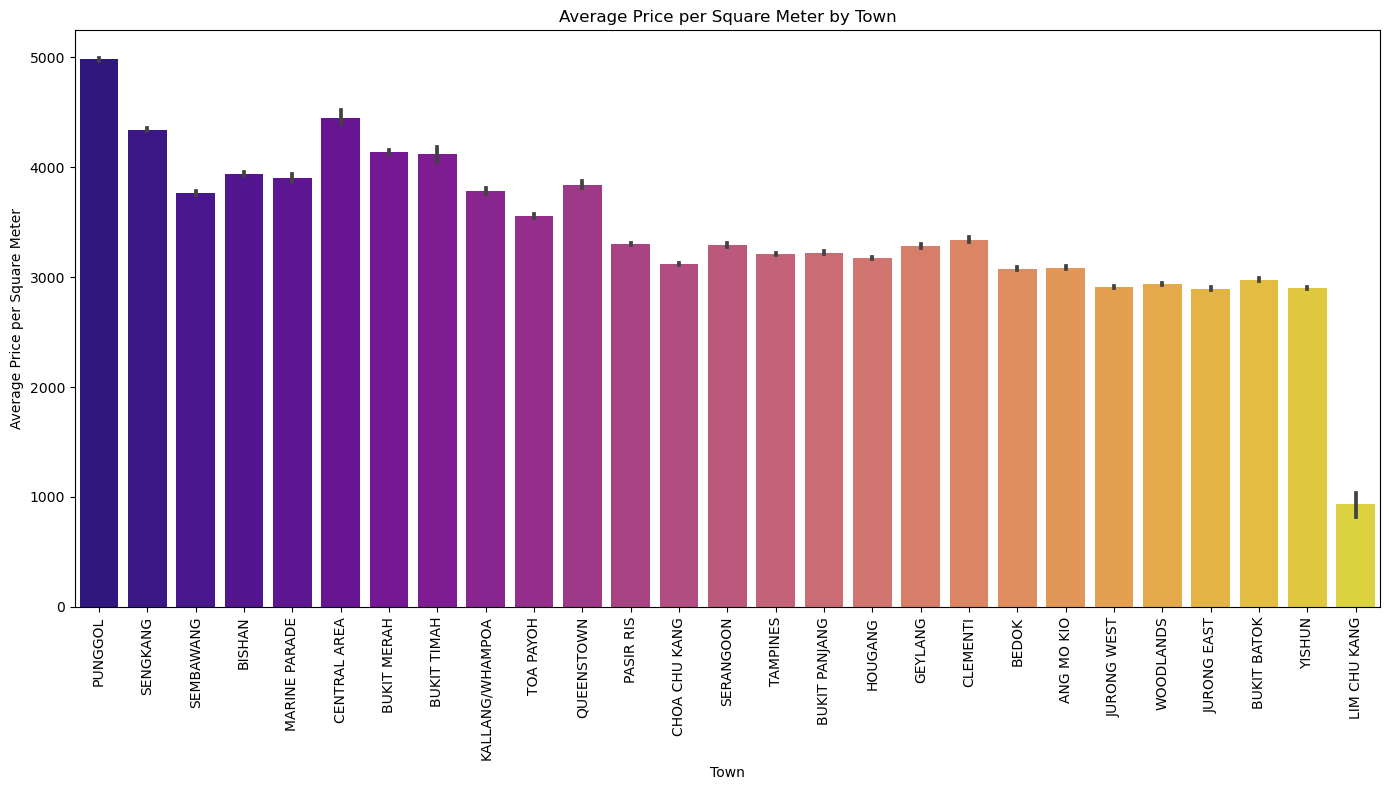

In [163]:
# Plot betweem town and price_per_sqm
# Group by town and calculate the mean price per sqm
median_price_per_sqm = combined_df.groupby('town')['price_per_sqm'].median().reset_index()

# Sort values in descending order of price per sqm
median_price_per_sqm = median_price_per_sqm.sort_values(by='price_per_sqm', ascending=False)

# Set the order of towns for plotting
ordered_towns = median_price_per_sqm['town']

# Convert 'town' to categorical type with the specified order
combined_df['town'] = pd.Categorical(combined_df['town'], categories=ordered_towns, ordered=True)

# Plotting the bar plot
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
sns.barplot(x='town', y='price_per_sqm', data=combined_df, order=ordered_towns, palette='plasma')

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Add titles and labels
plt.title('Average Price per Square Meter by Town')
plt.xlabel('Town')
plt.ylabel('Average Price per Square Meter')

# Display the plot
plt.tight_layout()  # Adjust layout to make room for rotated x labels
plt.show()

C:\Users\my pc\AppData\Local\Temp\ipykernel_2088\3378873768.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price_per_sqm_four_room = four_room_df.groupby('town')['price_per_sqm'].mean().reset_index()
C:\Users\my pc\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


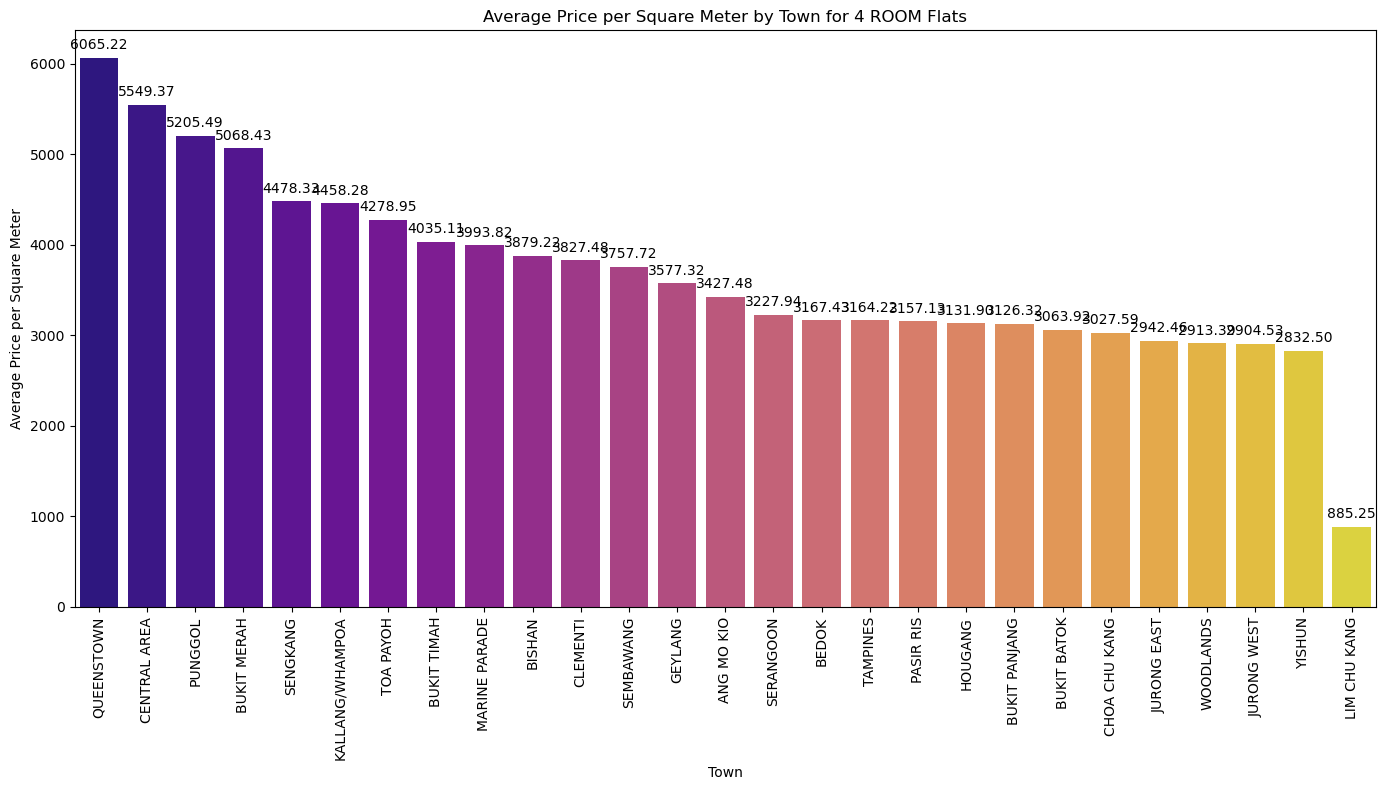

In [164]:
# town vs 4 room type vs price_per_sqm

# Assuming combined_df is your DataFrame
# Filter the DataFrame for '4 ROOM' flat type
four_room_df = combined_df[combined_df['flat_type'] == '4 ROOM']

# Group by town and calculate the mean price per sqm for '4 ROOM' flat type
mean_price_per_sqm_four_room = four_room_df.groupby('town')['price_per_sqm'].mean().reset_index()

# Sort the DataFrame in descending order of price per sqm
mean_price_per_sqm_four_room = mean_price_per_sqm_four_room.sort_values(by='price_per_sqm', ascending=False)

# Set the order of towns for plotting
ordered_towns = mean_price_per_sqm_four_room['town']

# Plotting the bar plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='town', y='price_per_sqm', data=mean_price_per_sqm_four_room, order=ordered_towns, palette='plasma')
plt.xticks(rotation=90)
plt.title('Average Price per Square Meter by Town for 4 ROOM Flats')
plt.xlabel('Town')
plt.ylabel('Average Price per Square Meter')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

C:\Users\my pc\AppData\Local\Temp\ipykernel_2088\3296109190.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_df['price_per_sqm'])
C:\Users\my pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


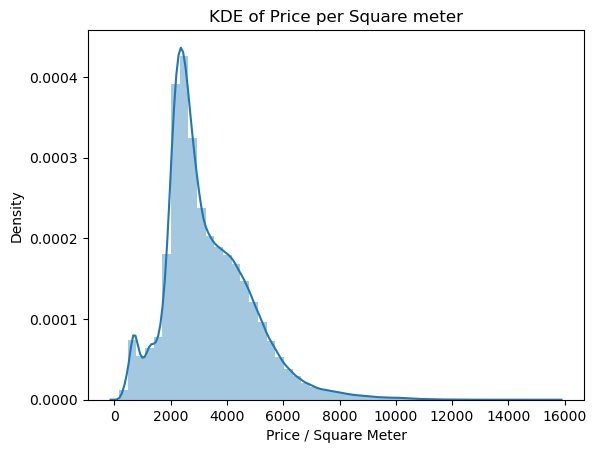

(Text(0.5, 24.0, 'Price / Square Meter'),
 Text(0.5, 1.0, 'KDE of Price per Square meter'),
 None)

In [118]:
sns.distplot(combined_df['price_per_sqm'])
plt.xlabel('Price / Square Meter'), plt.title('KDE of Price per Square meter'), plt.show()

In [111]:
combined_df['flat_model'].value_counts()

flat_model
Model A                   265481
Improved                  242031
New Generation            189089
Simplified                 57575
Premium Apartment          46870
Standard                   42565
Apartment                  35519
Maisonette                 17478
MAISONETTE                 12215
Model A2                   10148
DBSS                        3311
Model A-Maisonette          2079
Adjoined flat               1251
Terrace                      694
Multi Generation             543
Type S1                      437
Type S2                      217
Improved-Maisonette          126
2-room                       118
Premium Apartment Loft       108
Premium Maisonette            86
3Gen                          32
2-ROOM                        21
Name: count, dtype: int64

In [68]:
combined_df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'time_frame', 'remaining_lease', 'year', 'age_of_flat'],
      dtype='object')

In [86]:
combined_df['remaining_lease'].isnull().sum()

709050

In [87]:
combined_df['remaining_lease'].fillna(99-combined_df['age_of_flat'], inplace=True)

In [78]:
type(combined_df.loc[0,'remaining_lease'])

float

In [90]:
def get_remaining_lease_months(remaining_lease):
    if pd.isna(remaining_lease):  # Check if the value is NaN
        return None
    if isinstance(remaining_lease, int):  # Check if the value is a float, representing years only
        return remaining_lease * 12
    try:
        years_part, months_part = remaining_lease.split(' years ')
        years = int(years_part)
        months = int(months_part.split(' months')[0])
        return years * 12 + months
    except ValueError:
        # Handle cases where the format might not exactly match the expected pattern
        try:
            # Assume format might be like "10 years" without months
            years = int(remaining_lease.split(' years')[0])
            return years * 12
        except ValueError:
            return None  # If format is incorrect or unparsable

# Apply the function to the DataFrame
combined_df['remaining_lease_months'] = combined_df['remaining_lease'].apply(get_remaining_lease_months)

# Check the result
print(combined_df[['remaining_lease', 'remaining_lease_months']].head())

  remaining_lease  remaining_lease_months
0              52                     624
1              52                     624
2              52                     624
3              52                     624
4              51                     612


In [106]:
combined_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,time_frame,remaining_lease,year,age_of_flat,remaining_lease_months,storey_level,price_per_sqm
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,1990-1999,52,1990,47,624,11.0,290.322581
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,1990-1999,52,1990,47,624,5.0,193.548387
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,1990-1999,52,1990,47,624,11.0,258.064516
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,1990-1999,52,1990,47,624,8.0,193.548387
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,1990-1999,51,1990,48,612,5.0,646.575342


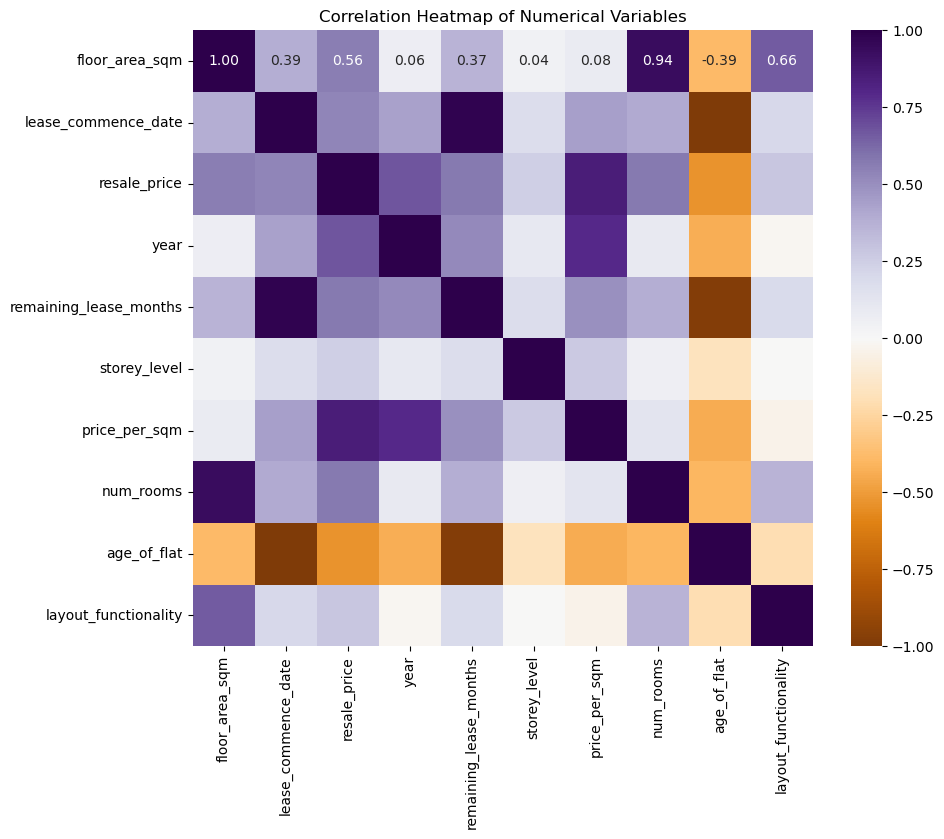

In [150]:
# Select numerical columns for the heatmap
numerical_columns = ['floor_area_sqm', 'lease_commence_date', 'resale_price', 'year',
                     'remaining_lease_months', 'storey_level', 'price_per_sqm',
                     'num_rooms', 'age_of_flat', 'layout_functionality']

# Calculate the correlation matrix
corr_matrix = combined_df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()